In [10]:
# Hongxi Pu UM Uniquename <hongxi>

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNBfrom
import sklearn.naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from io import StringIO
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import sys, os
import math
import regex as re
import random

# I borrowed it from @https://github.com/fsfkellner/NLP_Example/blob/main/contractionsDict.csv
contractionsDict = {
    'ain\'t': ['aint'],
    'amn\'t': ['am', 'not'],
    'aren\'t': ['are', 'not'],
    'can\'t': ['can', 'not'],
    'could\'ve': ['could', 'have'],
    'couldn\'t': ['could', 'not'],
    'daren\'t': ['dare', 'not'],
    'daresn\'t': ['dare', 'not'],
    'dasen\'t': ['dare', 'not'],
    'didn\'t': ['did', 'not'],
    'doesn\'t': ['does', 'not'],
    'don\'t': ['do', 'not'],
    'e\'er': ['ever'],
    'hadn\'t': ['had', 'not'],
    'hasn\'t': ['has' 'not'],
    'haven\'t': ['have', 'not'],
    'he\'d': ['he', 'would'],
    'he\'ll': ['he', 'will'],
    'he\'s': ['he', 'is'],
    'how\'d': ['how', 'did'],
    'how\'ll': ['how', 'will'],
    'how\'s': ['how', 'is'],
    'i\'d': ['i', 'would'],
    'i\'ll': ['i', 'will'],
    'i\'m': ['i', 'am'],
    'i\'m\'a': ['i', 'am', 'going', 'to'],
    'i\'ve': ['i', 'have'],
    'isn\'t': ['is', 'not'],
    'it\'d': ['it', 'would'],
    'it\'ll': ['it', 'will'],
    'it\'s': ['it', 'is'],
    'let\'s': ['let', 'us'],
    'ma\'am': ['madam'],
    'mayn\'t': ['may', 'not'],
    'may\'ve': ['may', 'have'],
    'mightn\'t': ['might', 'not'],
    'might\'ve': ['might', 'have'],
    'mustn\'t': ['must', 'not'],
    'must\'ve': ['must', 'have'],
    'needn\'t': ['need', 'not'],
    'ne\'er': ['never'],
    'o\'clock': ['of', 'the', 'clock'],
    'o\'er': ['over'],
    'ol\'': ['old'],
    'oughtn\'t': ['ought', 'not'],
    'shan\'t': ['shall', 'not'],
    'she\'d': ['she', 'would'],
    'she\'ll': ['she', 'will'],
    'she\'s': ['she', 'is'],
    'should\'ve': ['should', 'have'],
    'shouldn\'t': ['should', 'not'],
    'something\'s': ['something', 'is'],
    'that\'ll': ['that', 'will'],
    'that\'re': ['that', 'are'],
    'that\'s': ['that', 'has'],
    'that\'d': ['that', 'would'],
    'there\'d': ['there', 'would'],
    'there\'re': ['there', 'are'],
    'there\'s': ['there', 'is'],
    'these\'re': ['these', 'are'],
    'they\'d': ['they', 'would'],
    'they\'ll': ['they', 'will'],
    'they\'re': ['they', 'are'],
    'they\'ve': ['they', 'have'],
    'this\'s': ['this', 'is'],
    'those\'re': ['those', 'are'],
    '\'tis': ['it', 'is'],
    '\'twas': ['it', 'was'],
    'wasn\'t': ['was', 'not'],
    'we\'d': ['we', 'would'],
    'we\'d\'ve': ['we', 'would', 'have'],
    'we\'ll': ['we', 'will'],
    'we\'re': ['we', 'are'],
    'we\'ve': ['we', 'have'],
    'weren\'t': ['were', 'not'],
    'what\'d': ['what', 'would'],
    'what\'ll': ['what', 'will'],
    'what\'re': ['what', 'are'],
    'what\'s': ['what', 'is'],
    'what\'ve': ['what', 'have'],
    'when\'s': ['when', 'is'],
    'where\'d': ['where', 'would'],
    'where\'re': ['where', 'are'],
    'where\'s': ['where', 'is'],
    'where\'ve': ['where', 'have'],
    'which\'s': ['which', 'is'],
    'who\'d': ['who', 'would'],
    'who\'d\'ve': ['who', 'would', 'have'],
    'who\'ll': ['who', 'will'],
    'who\'re': ['who', 'are'],
    'who\'s': ['who', 'is'],
    'who\'ve': ['who', 'have'],
    'why\'d': ['why', 'would'],
    'why\'re': ['why', 'are'],
    'why\'s': ['why', 'is'],
    'won\'t': ['will', 'not'],
    'would\'ve': ['would', 'have'],
    'wouldn\'t': ['would', 'have'],
    'y\'all': ['you', 'all'],
    'you\'d': ['you', 'would'],
    'you\'ll': ['you', 'will'],
    'you\'re': ['you', 'are'],
    'you\'ve': ['you', 'have']
}
# source http://www.enchantedlearning.com/abbreviations/
abbreviationsAcro = ['abbr.', 'Acad.', 'alt.', 'A.D.', 'A.M.', 'apt.', 'Assn.', 'Aug.', 'Ave.', 'B.A.', 'B.S.', 'B.C.',
                     'Blvd.', 'Capt.', 'ctr.', 'cent.', 'Col.', 'Cpl.', 'Corp.', 'Ct.', 'dept.', 'D.C.', 'Dr.', 'div.',
                     'Dr.', 'ed.', 'etc.', 'Feb.', 'ft.', 'Ft.', 'gal.', 'Gen.', 'Gov.', 'hwy.', 'i.e.', 'in.', 'inc.',
                     'Jan.', 'Jr.', 'Lk.', 'Ln.', 'lib.', 'lat.', 'lib.', 'Lt.', 'Ltd.', 'long.', 'M.D.', 'M.D.', 'Mr.',
                     'Msgr.', 'mo.', 'mt.', 'mus.', 'Nov.', 'no.', 'Oct.', 'oz.', 'p.', 'pt.', 'pl.', 'pop.', 'P.M.',
                     'Prof.', 'qt.', 'Rd.', 'R.N.', 'Sept.', 'Sgt.', 'Sr.', 'Sta.', 'St.', 'ste.', 'Sun.', 'Ter.',
                     'Tpk.', 'Univ.', 'U.S.A.', 'vol.']


class Bayes:
    def __init__(self):
        self.voc_set = set()
        self.tag2count = defaultdict(lambda: defaultdict(int))
        self.tag2n = defaultdict(int)
        self.tag2file = defaultdict(int)

        self.tCount = defaultdict(int)
        self.tn = 0
        self.fn = 0
        self.fCount = defaultdict(int)
        self.tfile = 0
        self.ffile = 0


def tokenizeText(text):
    # replace all all punctuations !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~ except for period, commas, apostrophes,
    # slash. and hyphens with space (to be split later)
    p = re.compile("[^,./\-\w\s]+")
    newText = re.sub(p, " ", text)
    # remove spaces, newline, tab and all other forms of whitespace
    words = newText.split()
    for i in range(len(words)):
        # to lower case
        words[i] = words[i].lower()

    tokens = []  # create a new list since insert is O(n)
    # tokenization of commas first (so that I can check up period acronyms etc.
    for w in words:
        if ',' not in w:
            tokens.append(w)
        # numbers are not tokenized
        elif re.sub(",", "", w).isdigit():
            tokens.append(w)
        elif w == ',':
            tokens.append(w)
        elif w[-1] == ',':
            # I assume that the text is grammarly correct: that is , is always followed by space when not used
            # as a part of the word
            # thus here, where commas appears in all other grammarly incorrect situation, commas is removed as a typo
            tokens.extend(w[:-1].split(','))
            tokens.append(',')
        else:
            # I assume that the text is grammarly correct: that is , is always followed by space when not used
            # as a part of the word
            # thus here, where commas appears in all other grammarly incorrect situation, commas is removed as a typo
            tokens.extend(w.split(','))

    # tokenization of period
    ComTokens = []
    for w in tokens:
        if not w:
            continue
        # the following 5 elif conditions can be combined
        # but for code readability, they are listed separately as below
        elif '.' not in w:
            ComTokens.append(w)
        # numbers are not tokenized
        elif re.sub('.', "", w).isdigit():
            ComTokens.append(w)
        elif w == '.':
            ComTokens.append(w)
        # acronyms and abbreviation:
        # For other acronyms, they are less common thus I chose to not treat them as acronyms
        elif w in abbreviationsAcro:
            ComTokens.append(w)
        elif w[-1] == '.':
            # I assume that the text is grammarly correct: that is , is always followed by space when not used
            # as a part of the word
            # thus here, where commas appears in all other grammarly incorrect situation, commas is removed as a typo
            ComTokens.extend(w[:-1].split('.'))
            ComTokens.append('.')
        else:
            # I assume that the text is grammarly correct: that is , is always followed by space when not used
            # as a part of the word
            # thus here, where commas appears in all other grammarly correct situation, commas is considered as part of the word
            # using ComTokens.extend(w.split('.')) instead will have no difference after trails
            ComTokens.append(w)

    ApoTokens = []
    # tokenization of apostrophes
    for w in ComTokens:
        if not w:
            continue
        if '\'' not in w or '\'' == w:
            ApoTokens.append(w)
        elif w in contractionsDict:
            ApoTokens.extend(contractionsDict[w])
        # for general 's
        elif w[-2:] == "\'s":
            ApoTokens.extend(w[:-2].split('\''))
            ApoTokens.append(w[-2:])
        else:  # assuming all texts are grammarly correct, i.e. other ' can be removed
            ApoTokens.extend(w.split('\''))
    # tokenization of hyphens

    # by leaving it be, I treated hyphen connected word as a whole

    # tokenization of slash
    SlaTokens = []
    for w in ApoTokens:
        tmp = re.sub('/', "", w)
        if not w:
            continue
        if '/' not in w:
            SlaTokens.append(w)
        # date by checking whether it's a number without / and length
        elif (tmp.isdigit() and len(tmp) > 3 and len(tmp) < 9):
            # date length can be from 4 to 8 e.g. 1/1/22 to 01/01/2022
            SlaTokens.append(w)
        else:
            SlaTokens.extend(w.split('/'))

    return SlaTokens


def read_text_file(file_path):
    with open(file_path, 'r') as f:
        ans = (f.read())
    return ans


def data_load(N):
    in_data = []
    in_labels = []
    path = "./Datasets/Australia"
    for file in os.listdir(path):
        if len(in_labels) > N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("aus")
    path = "./Datasets/British"
    for file in os.listdir(path):
        if len(in_labels) > 2 * N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("bri")
    path = "./Datasets/US_clean"
    for file in os.listdir(path):
        if len(in_labels) > 3 * N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("us")
    path = "./Datasets/Russian"
    for file in os.listdir(path):
        if len(in_labels) > 4 * N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("rus")

    path = "./Datasets/Chinese"
    for file in os.listdir(path):
        if len(in_labels) > 5 * N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("cn")

    path = "./Datasets/Spanish"
    for file in os.listdir(path):
        if len(in_labels) > 6 * N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("spa")



    # shuffle
    tmp = list(zip(in_data, in_labels))
    random.shuffle(tmp)
    in_data, in_labels = zip(*tmp)
    return in_data, in_labels


def data_load_en(N):
    in_data = []
    in_labels = []
    path = "./Datasets/Australia"
    for file in os.listdir(path):
        if len(in_labels) > N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("aus")
    path = "./Datasets/British"
    for file in os.listdir(path):
        if len(in_labels) > 2 * N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("bri")
    path = "./Datasets/US_clean"
    for file in os.listdir(path):
        if len(in_labels) > 3 * N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("us")


    # shuffle
    tmp = list(zip(in_data, in_labels))
    random.shuffle(tmp)
    in_data, in_labels = zip(*tmp)
    return in_data, in_labels

def data_load_nonen(N):
    in_data = []
    in_labels = []
    path = "./Datasets/Russian"
    for file in os.listdir(path):
        if len(in_labels) >  N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("rus")

    path = "./Datasets/Chinese"
    for file in os.listdir(path):
        if len(in_labels) > 2 * N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("cn")

    path = "./Datasets/Spanish"
    for file in os.listdir(path):
        if len(in_labels) > 3 * N:
            break
        file_path = f"{path}/{file}"
        in_data.append(read_text_file(file_path))
        in_labels.append("spa")


    # shuffle
    tmp = list(zip(in_data, in_labels))
    random.shuffle(tmp)
    in_data, in_labels = zip(*tmp)
    return in_data, in_labels


def testdata_load(N):
    in_data = []
    in_labels = []
    path = "./Datasets/test/Australia"
    for file in os.listdir(path):
        if len(in_labels) > N:
            break
        file_path = f"{path}/{file}"
        if not file.startswith('.') and os.path.isfile(file_path):
            in_data.append(read_text_file(file_path))
            in_labels.append("aus")
    path = "./Datasets/test/British"
    for file in os.listdir(path):
        if len(in_labels) > 2 * N:
            break
        file_path = f"{path}/{file}"
        if not file.startswith('.') and os.path.isfile(file_path):
            in_data.append(read_text_file(file_path))
            in_labels.append("bri")
    path = "./Datasets/test/US"
    for file in os.listdir(path):
        if len(in_labels) > 3 * N:
            break
        file_path = f"{path}/{file}"
        if not file.startswith('.') and os.path.isfile(file_path):
            in_data.append(read_text_file(file_path))
            in_labels.append("us")
    path = "./Datasets/test/Russian"
    for file in os.listdir(path):
        if len(in_labels) > 4 * N:
            break
        file_path = f"{path}/{file}"
        if not file.startswith('.') and os.path.isfile(file_path):
            in_data.append(read_text_file(file_path))
            in_labels.append("rus")

    path = "./Datasets/test/Chinese"
    for file in os.listdir(path):
        if len(in_labels) > 5 * N:
            break
        file_path = f"{path}/{file}"
        if not file.startswith('.') and os.path.isfile(file_path):
            in_data.append(read_text_file(file_path))
            in_labels.append("cn")

    path = "./Datasets/test/Spanish"
    for file in os.listdir(path):
        if len(in_labels) > 6 * N:
            break
        file_path = f"{path}/{file}"
        if not file.startswith('.') and os.path.isfile(file_path):
            in_data.append(read_text_file(file_path))
            in_labels.append("spa")



    # shuffle
    tmp = list(zip(in_data, in_labels))
    random.shuffle(tmp)
    in_data, in_labels = zip(*tmp)
    return in_data, in_labels

Please only run one of "all languages, english only, and translated only" below to load data.
Then jump to cross validation 
# All Languages 

In [4]:
ALL_TAGS = ["aus", "bri", "rus", "cn", "spa", "us"]
N = 300  # NUM of jokes per culture
data, labels = data_load(N)

totalN = 6 * N

# English Only

In [3]:
ALL_TAGS = ["aus", "bri",  "us"]
N = 300  # NUM of jokes per culture
data, labels = data_load_en(N)

totalN = 3 * N



# Translated Only

In [14]:
ALL_TAGS = ["rus", "cn", "spa"]
N = 300  # NUM of jokes per culture
data, labels = data_load_nonen(N)

totalN = 3 * N

# Cross Validation
jump to here after runing one of three loading code cells

In [5]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')
features = tfidf.fit_transform(data).toarray()
# Normalize your training data
# bug solved ConvergenceWarning: Liblinear failed to converge, increase the number of iterations
scaler = preprocessing.StandardScaler().fit(features)
features = scaler.transform(features)


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(max_iter=100000),  # Linear Support Vector Classification. It takes longest time to train.
    # MultinomialNB(),  # Naive Bayes classifier for multinomial models
    LogisticRegression(random_state=0, max_iter=10000),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    print("now: ", model_name)
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

# NaiveBayes from scratch
n = len(data)
window = n // CV
bay = Bayes()
for cv in range(CV):
    for i in range(n):
        if window * cv <= i < (cv + 1) * window:
            continue
        tokens = tokenizeText(data[i])
        label = labels[i]
        bay.tag2file[label] += 1
        for token in tokens:
            lToken = token.lower()
            bay.voc_set.add(lToken)
            bay.tag2n[label] += 1
            bay.tag2count[label][lToken] += 1
    correct_cnt = 0

    # validation
    for i in range(window * cv, (cv + 1) * window):
        tag2P = defaultdict(float)

        for tag in ALL_TAGS:
            tag2P[tag] = math.log(bay.tag2file[tag] / (n - window))
        tokens = tokenizeText(data[i])
        for token in tokens:
            lToken = token.lower()
            for tag in ALL_TAGS:
                tag2P[tag] += math.log((bay.tag2count[tag][lToken] + 1) / (bay.tag2n[tag] + len(bay.voc_set)))
        sorted_t = sorted(tag2P.keys(), key=lambda x: tag2P[x], reverse=True)
        if sorted_t[0] == labels[i]:
            correct_cnt += 1
    accuracy = correct_cnt / window
    entries.append(("Naive Bayes", cv, accuracy))

now:  RandomForestClassifier
now:  LinearSVC
now:  LogisticRegression


ValueError: math domain error

## Translated Only

model_name
LinearSVC                 0.805758
LogisticRegression        0.819067
Naive Bayes               0.945556
RandomForestClassifier    0.808011
Name: accuracy, dtype: float64


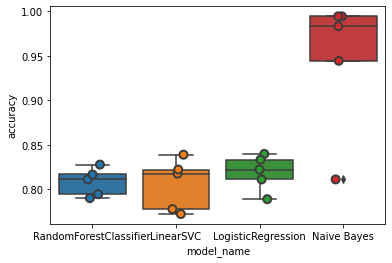

In [16]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()
plt.savefig("nonen.jpg")
print(cv_df.groupby('model_name').accuracy.mean())

## English Only

In [ ]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()
plt.savefig("en.jpg")
print(cv_df.groupby('model_name').accuracy.mean())

## All Language

In [ ]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()
plt.savefig("all.jpg")
print(cv_df.groupby('model_name').accuracy.mean())

## Test
Since Naive Bayes has the best performance, we choose Naive Bayes for testing

In [12]:
ALL_TAGS = ["aus", "bri", "rus", "cn", "spa", "us"]
N = 100  # NUM of jokes per culture
test_data, test_labels = testdata_load(N)

N = 300  # NUM of jokes per culture
data, labels = data_load(N)


bay = Bayes()
# NaiveBayes from scratch
n = len(data)
for i in range(n):
    tokens = tokenizeText(data[i])
    label = labels[i]
    bay.tag2file[label] += 1
    for token in tokens:
        lToken = token.lower()
        bay.voc_set.add(lToken)
        bay.tag2n[label] += 1
        bay.tag2count[label][lToken] += 1
correct_cnt = 0

    # test
for i in range(len(test_data)):
    tag2P = defaultdict(float)

    for tag in ALL_TAGS:
        tag2P[tag] = math.log(bay.tag2file[tag] / n)
    tokens = tokenizeText(test_data[i])
    for token in tokens:
        lToken = token.lower()
        for tag in ALL_TAGS:
            tag2P[tag] += math.log((bay.tag2count[tag][lToken] + 1) / (bay.tag2n[tag] + len(bay.voc_set)))
    sorted_t = sorted(tag2P.keys(), key=lambda x: tag2P[x], reverse=True)
    if sorted_t[0] == test_labels[i]:
        correct_cnt += 1
accuracy = correct_cnt / len(test_data)
print("accuracy: ", accuracy)

accuracy:  0.757071547420965
